In [1]:
import numpy as np
import nltk
import math
from nltk.corpus import brown
import EM

sents = brown.sents()
train_sentences = []
for sent in sents:
	for ind, item in enumerate(sent):
		sent[ind] = item.lower()                        # lowercase all words in the corpus
	sent.append('END')                                  # append END symbol to all sentences
	train_sentences.append(sent)
(word_to_id, bigram_to_id) = EM.create_mapping(train_sentences)
vocab_size = len(word_to_id)
bigram_size = len(bigram_to_id)
print 'Vocab size: '+str(vocab_size)
print 'Bigram size: '+str(bigram_size)

Vocab size: 49816
Bigram size: 429075


In [3]:
import EM

#Other user defined parameters
latentclass_size = 3
iterations = 3
#Create EMPredictor object
EMPredictor = EM.BigramEM(vocab_size, latentclass_size, bigram_size)
#Run iterations of the EM algorithm
for i in range(iterations):
    EMPredictor.EStep(word_to_id, bigram_to_id)
    EMPredictor.MStep(word_to_id, bigram_to_id)

calculate_expected_count = True
#Perform one more iteration
EMPredictor.EStep(word_to_id, bigram_to_id)
EMPredictor.MStep(word_to_id, bigram_to_id, train_sentences, calculate_expected_count)

row_column_sum = 0
for i in range(latentclass_size):
    row_column_sum += sum(EMPredictor.transitionMatrix[i, :])
print 'Row_col_sum for transmission matrix: ' + str(row_column_sum)

Expected count of word fawn is: 1.0
Actual counts of word fawn is: 1
Expected count of word belligerence is: 2.0
Actual counts of word belligerence is: 2
Expected count of word mid-week is: 1.0
Actual counts of word mid-week is: 1
Expected count of word 1,800 is: 1.0
Actual counts of word 1,800 is: 1
Expected count of word deferment is: 1.0
Actual counts of word deferment is: 1
Row_col_sum for transmission matrix: 49816.3623068


In [6]:
iterations = 20
for i in range(iterations):
	EMPredictor.EStep(word_to_id, bigram_to_id)
	EMPredictor.MStep(word_to_id, bigram_to_id)
	TokLL = EMPredictor.corpusLL(train_sentences, word_to_id)
	print 'iteration '+str(i)+' Per Token Likelihood '+str(TokLL)

iteration 0 Per Token Likelihood -6.8532137775
iteration 1 Per Token Likelihood -6.8015947837
iteration 2 Per Token Likelihood -6.73313628366
iteration 3 Per Token Likelihood -6.66636360932
iteration 4 Per Token Likelihood -6.61820555599
iteration 5 Per Token Likelihood -6.58149925872
iteration 6 Per Token Likelihood -6.55329341682
iteration 7 Per Token Likelihood -6.53225469964
iteration 8 Per Token Likelihood -6.51612402125
iteration 9 Per Token Likelihood -6.50345503978
iteration 10 Per Token Likelihood -6.49401223349
iteration 11 Per Token Likelihood -6.48696100974
iteration 12 Per Token Likelihood -6.48134617363
iteration 13 Per Token Likelihood -6.47675828146
iteration 14 Per Token Likelihood -6.4729377809
iteration 15 Per Token Likelihood -6.46965840763
iteration 16 Per Token Likelihood -6.4668159663
iteration 17 Per Token Likelihood -6.46441857372
iteration 18 Per Token Likelihood -6.46239591947
iteration 19 Per Token Likelihood -6.46064248984


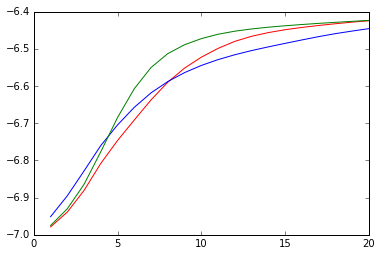

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

latentclass_size = 3
iterations = 20
numplot = 3
colourDict = {0:'r', 1:'b', 2:'g'}
iterlist = [i+1 for i in range(iterations)]

for n in range(numplot):
	LLlist = []
	EMPredictor = EM.BigramEM(vocab_size, latentclass_size, bigram_size)
	for i in range(iterations):
		EMPredictor.EStep(word_to_id, bigram_to_id)
		EMPredictor.MStep(word_to_id, bigram_to_id)
		TokLL = EMPredictor.corpusLL(train_sentences, word_to_id)
		LLlist.append(TokLL)
	colour = colourDict[n]
	plt.plot(iterlist, LLlist, colour)

plt.show()


In [12]:
EMPredictor = EM.BigramEM(vocab_size, latentclass_size, bigram_size)
for i in range(iterations):
	EMPredictor.EStep(word_to_id, bigram_to_id)
	EMPredictor.MStep(word_to_id, bigram_to_id)

sent = ['colorless', 'green', 'ideas', 'sleep', 'furiously']
LLsent1 = EMPredictor.LL(sent, word_to_id)
print 'Log Likelihood for the sentence "colorless green ideas sleep furiously" '+str(LLsent1)
sent = ['furiously', 'sleep', 'ideas', 'green', 'colorless']
LLsent2 = EMPredictor.LL(sent, word_to_id)
print 'Log Likelihood for the sentence "furiously sleep ideas green colorless" '+str(LLsent2)
ratio = math.exp(LLsent1-LLsent2)
print 'Prob Ratio of the above sentences is '+str(ratio)

Log Likelihood for the sentence "colorless green ideas sleep furiously" -41.693660641
Log Likelihood for the sentence "furiously sleep ideas green colorless" -51.5500567322
Prob Ratio of the above sentences is 19080.00279


In [27]:
sent = ['a', 'rose', 'by', 'any', 'other', 'name', 'would', 'smell', 'as', 'sweet', 'END']
print 'EMPredictor.LL(sent, word_to_id)
sent = ['a', 'smell', 'would', 'sweet', 'name', 'any', 'rose', 'as', 'by', 'other', 'END']
print EMPredictor.LL(sent, word_to_id)
sent = ['all', 'is', 'well', 'that', 'ends', 'well', 'END']
print EMPredictor.LL(sent, word_to_id)
sent = ['is','well', 'that', 'well', 'ends', 'all', 'END']
print EMPredictor.LL(sent, word_to_id)
sent = ['in', 'politics', ',', 'never', 'retreat', ',', 'never', 'admit', 'a', 'mistake', 'END']
print EMPredictor.LL(sent, word_to_id)
sent = ['mistake', 'politics', ',', 'never', 'in', 'a', 'retreat', 'admit', ',', 'never', 'END']
print EMPredictor.LL(sent, word_to_id)

-66.47456782
-69.3822228393
-72.3147508639
-43.2474741155
-97.9097414323
-94.6832952548
